# ABCD Extraction - Part 2

### This file contains the extraction of ABCD features. The steps performed are:

1. Pass threshold image to asymmetry, border and diameter functions and result image to color function
2. Find the total number of affected pixels (A), unaffected pixels, and the difference between unaffected and affected pixels (a).
3. Computer asymmetry through the formula 
4. Perform edge detection and return matrix with value set to one where pixel border exists 
5. Calculate the inverse of shape factor 
6. Compute the border using the formula 
7. Compute standard deviation and mean for pixel values 
8. Compute the color.
9. Compute the diameter using the formula


In [1]:
import numpy as np
import math
import scipy
from scipy import misc
from scipy import ndimage
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import imageio

Define the different functions needed for the extraction

In [2]:
def sobel(array):
        Gdash=array
        shape=array.shape
        gx=np.array([[-2,-1,0,1,2] for i in range(0,5)])
        gy=np.array([np.repeat(i,5) for i in range (-2,3)])
        gf=np.array([[np.exp(-(gx[i,j]*gx[i,j]+gy[i,j]*gy[i,j])/3) for j in range(0,5)] for i in range(0,5)])
        smooth=np.array([([np.sum(gf*array[i:i+5,j:j+5])/25 for j in range(0,shape[1]-4)]) for i in range(0,shape[0]-4)])
        for i in range(2,shape[0]-2):
            for j in range(2,shape[1]-2):
                 Gdash[i,j]=smooth[i-2,j-2]
        G=Gdash
        sobely=np.array([[3,0,-3],[10,0,-10],[3,0,-3]])
        sobelx=np.array([[3,10,3],[0,0,0],[-3,-10,-3]])
        Gx=np.array([([np.sum(sobelx*array[i:i+3,j:j+3])/9 for j in range(0,shape[1]-2)]) for i in range(0,shape[0]-2)])
        Gy=np.array([([np.sum(sobely*array[i:i+3,j:j+3])/9 for j in range(0,shape[1]-2)]) for i in range(0,shape[0]-2)])                
        Gx=[[Gx[i,j]*Gx[i,j] for j in range(0,shape[1]-2)] for i in range(0,shape[0]-2)]
        Gy=[[Gy[i,j]*Gy[i,j] for j in range(0,shape[1]-2)] for i in range(0,shape[0]-2)]
        tempG=np.sqrt(np.add(Gx,Gy))
        for i in range(1,shape[0]-1):
            for j in range(1,shape[1]-1):
                 G[i,j]=tempG[i-1,j-1]
        G.astype(int)      
        return G

def Area(img):
    naffect=0
    affect=0
    for rownum in range(len(img)):
        for colnum in range(len(img[rownum])):
            if img[rownum,colnum] == 0 :
                naffect=naffect+1
            else:
                affect=affect+1
    a=naffect-affect
    A=affect
    return a,A

def ColourCalc(hsvimg):
    mean=0
    SD=0
    for row in range(len(hsvimg)):
        for col in range(len(hsvimg[row])):
            mean=mean+hsvimg[row,col,0]
    for row in range(len(hsvimg)):
        for col in range(len(hsvimg[row])):
            SD=SD+(hsvimg[row,col,0]-mean)*(hsvimg[row,col,0]-mean)
    width,height,val=hsvimg.shape
    n=width*height
    SD=math.sqrt(SD)/(n-1)
    return SD

This shows the ABCD values of a benign sample image

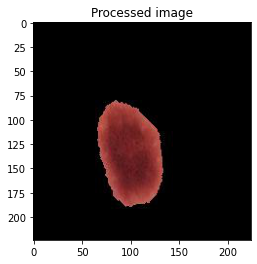

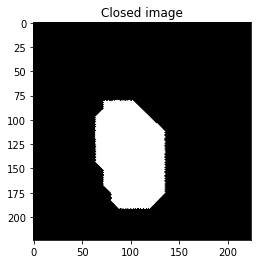

Asymmetry
55.86332022981554


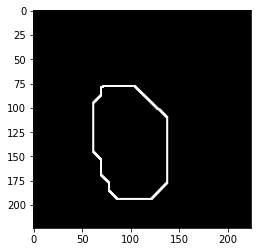

Border
0.7100167758412478
Diameter
0.5869234759887073
Colour
1.3350674216473404


In [4]:
if __name__== "__main__":

    img=imageio.imread('C:/Users/Kannan-PC/Desktop/Projects/melanoma/Final Year Project/Result.jpg')
    img2=imageio.imread('C:/Users/Kannan-PC/Desktop/Projects/melanoma/Final Year Project/threshold.jpg')
    plt.title('Processed image')
    plt.imshow(img)
    plt.show()
    dilimg=ndimage.binary_dilation(img2)
    for x in range(25):
        dilimg=ndimage.binary_dilation(dilimg)
    erimg=ndimage.binary_erosion(dilimg)
    for x in range(25):
        erimg=ndimage.binary_erosion(erimg)
    plt.title('Closed image')
    plt.imshow(erimg,cmap=cm.Greys_r)
    plt.show()
    a,A=Area(erimg)

    Asymmetry=((a/A)*100)/10
    if Asymmetry<0 :
        Asymmetry=Asymmetry*(-1)
    print('Asymmetry')
    print(Asymmetry)


    gigi=sobel(erimg)
    plt.imshow(gigi,cmap=cm.Greys_r)
    plt.show()
    pcount=0
    for row in range(len(gigi)):
        for col in range(len(gigi[row])):
            if gigi[row,col] == 1:
                pcount=pcount+1
    P=pcount
    Border=((P*P)/(4*3.14*A))/10
    print('Border')
    print(Border)

    n=(4*A)/P
    Diameter=(math.sqrt(n))/10
    print('Diameter')
    print(Diameter)

    hsvimg=matplotlib.colors.rgb_to_hsv(img)

    Colour=(ColourCalc(hsvimg))/10	
    print('Colour')
    print(Colour)
